# Projeto prático FT045B II
## Autor: Bruno Ricardo Corrêa

Os dados obtidos no estudo NHANES (2021-2023) estavam separados em diferentes datasets, para que fosse possível utilizar para o treinamento de modelos de Aprendizado de Máquina, foi necessário fazer uma união dos mesmos, para melhor organização o procedimento de preparar o dataset foi feito em um Notebook a parte:
[Notebook de Preparação do Dataset](https://colab.research.google.com/drive/1ER1DUe7lbgODe1OANINtZaC5eA9mSM72?usp=sharing)

---

# CORRIGIR NOMES E EXPLICAÇÕES DAS VARIÁVEIS

### cvd_df (nhanes_2021_2023_merged_data.csv)
Contém informações demográficas sobre os entrevistados.

* `SEQN`: Número de sequência do entrevistado (Identificador)


## Importação de Bibliotecas

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

## Carregamento do dataset e análise exploratória


In [230]:
# Read the dataset
cvd_df = pd.read_csv('nhanes_2021_2023_merged_data.csv')

In [231]:
cvd_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,MCQ230D,OSQ230,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680,target
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,2.0,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0,0
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,1.0,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0,0
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,1.0,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0,0
3,130384.0,12.0,1.0,1.0,43.0,NaN,1.0,1.0,NaN,NaN,...,NaN,2.0,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0,0
4,130385.0,12.0,1.0,2.0,65.0,NaN,3.0,3.0,NaN,NaN,...,NaN,2.0,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0,0


In [232]:
cvd_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 216 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    SEQN      7806 non-null   float64
 1    SDDSRVYR  7806 non-null   float64
 2    RIDSTATR  7806 non-null   float64
 3    RIAGENDR  7806 non-null   float64
 4    RIDAGEYR  7806 non-null   float64
 5    RIDAGEMN  0 non-null      float64
 6    RIDRETH1  7806 non-null   float64
 7    RIDRETH3  7806 non-null   float64
 8    RIDEXMON  6062 non-null   float64
 9    RIDEXAGM  0 non-null      float64
 10   DMQMILIZ  7792 non-null   float64
 11   DMDBORN4  7791 non-null   float64
 12   DMDYRUSR  1572 non-null   float64
 13   DMDEDUC2  7792 non-null   float64
 14   DMDMARTZ  7791 non-null   float64
 15   RIDEXPRG  1503 non-null   float64
 16   DMDHHSIZ  7806 non-null   float64
 17   DMDHRGND  0 non-null      float64
 18   DMDHRAGZ  0 non-null      float64
 19   DMDHREDZ  0 non-null      float64
 20   DMDHRM

In [233]:
# Show the dataset statistical metrics
cvd_df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,MCQ230B,MCQ230C,MCQ230D,OSQ230,PAD790Q,PAD800,PAD810Q,PAD820,PAD680,target
count,7806.000000,7806.0,7806.000000,7806.000000,7806.000000,0.0,7806.000000,7806.000000,6062.000000,0.0,...,159.000000,26.000000,2.0,5721.000000,7.793000e+03,6088.000000,7.798000e+03,3452.000000,7.797000e+03,7806.000000
mean,136369.366001,12.0,1.776582,1.553549,53.627978,NaN,3.127082,3.312324,1.530683,NaN,...,28.654088,28.230769,66.0,1.708967,5.808662e+01,92.413108,4.901013e+01,96.835747,4.491851e+02,0.112862
std,3441.038782,0.0,0.416563,0.497156,17.529460,NaN,0.984306,1.394625,0.499099,NaN,...,8.714158,7.425942,0.0,0.747540,7.304054e+02,542.882523,6.853329e+02,602.375146,9.301982e+02,0.316444
min,130378.000000,12.0,1.000000,1.000000,20.000000,NaN,1.000000,1.000000,1.000000,NaN,...,10.000000,13.000000,66.0,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,5.397605e-79,0.000000
25%,133382.500000,12.0,2.000000,1.000000,38.000000,NaN,3.000000,3.000000,1.000000,NaN,...,23.000000,23.250000,66.0,1.000000,1.000000e+00,30.000000,5.397605e-79,30.000000,1.800000e+02,0.000000
50%,136409.000000,12.0,2.000000,2.000000,57.000000,NaN,3.000000,3.000000,2.000000,NaN,...,32.000000,29.000000,66.0,2.000000,2.000000e+00,45.000000,5.397605e-79,45.000000,3.000000e+02,0.000000
75%,139336.750000,12.0,2.000000,2.000000,68.000000,NaN,3.000000,3.000000,2.000000,NaN,...,34.000000,33.000000,66.0,2.000000,4.000000e+00,60.000000,2.000000e+00,60.000000,4.800000e+02,0.000000
max,142310.000000,12.0,2.000000,2.000000,80.000000,NaN,5.000000,7.000000,2.000000,NaN,...,39.000000,39.000000,66.0,9.000000,9.999000e+03,9999.000000,9.999000e+03,9999.000000,9.999000e+03,1.000000


In [234]:
# Counts the duplicated lines
cvd_df.duplicated().sum()

0

In [235]:
# Count women (2.0) and men (1.0)
cvd_df['RIAGENDR'].astype(str).map({'2.0': "Feminino", '1.0': "Masculino"}).value_counts()

RIAGENDR
Feminino     4321
Masculino    3485
Name: count, dtype: int64

In [236]:
# Count positive and negative diagnosis
cvd_df['target'].value_counts()

target
0    6925
1     881
Name: count, dtype: int64

# Pré-processamento

### Feature Engineering

In [237]:
# --- Feature Engineering for Smoking ---
smoking_conditions = [
    # Condition 1: Never Smoker
    # If SMQ020 (Smoked 100+ cigs) is 'No' (2)
    (cvd_df['SMQ020'] == 2),

    # Condition 2: Current Daily Smoker
    # If SMQ020 is 'Yes' (1) AND SMQ040 (Smokes now) is 'Every day' (1)
    (cvd_df['SMQ020'] == 1) & (cvd_df['SMQ040'] == 1),

    # Condition 3: Current Occasional Smoker
    # If SMQ020 is 'Yes' (1) AND SMQ040 (Smokes now) is 'Some days' (2)
    (cvd_df['SMQ020'] == 1) & (cvd_df['SMQ040'] == 2),

    # Condition 4: Former Smoker
    # If SMQ020 is 'Yes' (1) AND SMQ040 (Smokes now) is 'Not at all' (3)
    (cvd_df['SMQ020'] == 1) & (cvd_df['SMQ040'] == 3)
]

smoking_choices = [
    'Never Smoker',
    'Current Smoker (Daily)',
    'Current Smoker (Occasional)',
    'Former Smoker'
]

# 'Refused' (7) or 'Don't Know' (9) is marked as missing (None).
cvd_df['smoking'] = np.select(smoking_conditions, smoking_choices, default=None)

# --- Feature Engineering for Alcohol ---
alcohol_conditions = [
    # Condition 1: Abstainer
    # If ALQ111 (Ever drank) is 'No' (2) OR ALQ121 (How often) is 'Never in last year' (0)
    (cvd_df['ALQ111'] == 2) | (cvd_df['ALQ121'] == 0),

    # Condition 2: Heavy/Frequent Drinker
    # (Codes 1: Every day, 2: Nearly every day, 3: 3-4 times a week)
    (cvd_df['ALQ121'] >= 1) & (cvd_df['ALQ121'] <= 3),

    # Condition 3: Moderate Drinker
    # (Codes 4: 2 times a week, 5: Once a week, 6: 2-3 times a month)
    (cvd_df['ALQ121'] >= 4) & (cvd_df['ALQ121'] <= 6),

    # Condition 4: Occasional Drinker
    # (Codes 7: Once a month, 8: 7-11 times/year, 9: 3-6 times/year, 10: 1-2 times/year)
    (cvd_df['ALQ121'] >= 7) & (cvd_df['ALQ121'] <= 10)
]

alcohol_choices = [
    'Abstainer',
    'Heavy/Frequent Drinker',
    'Moderate Drinker',
    'Occasional Drinker'
]

# 'default=None' handles 'Refused' (7, 77) and 'Don't Know' (9, 99)
cvd_df['alcohol'] = np.select(alcohol_conditions, alcohol_choices, default=None)

print("\n--- Smoking Categories Created (Value Counts) ---")
# 'dropna=False' includes a count of the 'NaN' (missing) values
print(cvd_df['smoking'].value_counts(dropna=False))

print("\n--- Alcohol Categories Created (Value Counts) ---")
print(cvd_df['alcohol'].value_counts(dropna=False))


--- Smoking Categories Created (Value Counts) ---
smoking
Never Smoker                   4546
Former Smoker                  2049
Current Smoker (Daily)          948
Current Smoker (Occasional)     235
None                             28
Name: count, dtype: int64

--- Alcohol Categories Created (Value Counts) ---
alcohol
None                      3396
Occasional Drinker        1589
Moderate Drinker          1441
Heavy/Frequent Drinker     920
Abstainer                  460
Name: count, dtype: int64


In [238]:
# Assume 'cvd_df' is your fully merged DataFrame
print("Starting physical activity feature engineering...")

# --- 1. Helper Function to Calculate Minutes per Week ---
# This function will read the frequency, unit, and duration columns
# and output a single 'minutes per week' value.

def calculate_weekly_minutes(df, freq_col, unit_col, mins_col):
    """
    Calculates total weekly minutes of activity, normalizing from
    day, week, month, or year entries.
    """

    # Make copies to avoid changing original data
    freq = df[freq_col].copy()
    unit = df[unit_col].copy()
    mins = df[mins_col].copy()

    # Replace special codes (Refused, Don't Know) with NaN
    # This will cause them to be treated as 0 activity later
    freq = freq.replace([7777, 9999], np.nan)
    mins = mins.replace([7777, 9999], np.nan)

    # Calculate total minutes per unit (e.g., 30 mins * 3 times = 90)
    # This will result in NaN if freq, mins, or unit is missing
    total_mins_per_unit = freq * mins

    # --- Normalize to a weekly basis ---

    # Conditions for np.select
    conditions = [
        unit == "b'D'",  # Daily
        unit == "b'W'",  # Weekly
        unit == "b'M'",  # Monthly
        unit == "b'Y'"   # Yearly
    ]

    # Choices for normalization factors
    # How to convert the unit to a weekly value
    choices = [
        total_mins_per_unit * 7,          # (e.g., 20 mins * 3 times/day * 7 days/week)
        total_mins_per_unit * 1,          # (e.g., 90 mins * 1 time/week)
        total_mins_per_unit * (12 / 52),  # (e.g., 300 mins * 2 times/month * (12/52) weeks/month)
        total_mins_per_unit / 52          # (e.g., 5000 mins * 1 time/year / 52 weeks/year)
    ]

    # Apply the conversion
    # default=np.nan ensures anything not D, W, M, Y becomes NaN
    weekly_minutes = np.select(conditions, choices, default=np.nan)

    # **Crucial Step**: Assume missing activity data means 0 activity.
    # We fill with 0 *after* all calculations are done.
    # This converts all NaN (missing, refused, don't know) to 0.
    return pd.Series(weekly_minutes).fillna(0)

# --- 2. Apply the Function to Our DataFrame ---

# Create new columns for total weekly minutes for each intensity
cvd_df['MOD_MIN_PER_WEEK'] = calculate_weekly_minutes(cvd_df, 'PAD790Q', 'PAD790U', 'PAD800')
cvd_df['VIG_MIN_PER_WEEK'] = calculate_weekly_minutes(cvd_df, 'PAD810Q', 'PAD810U', 'PAD820')

print("Weekly minutes calculated.")

# --- 3. Create the Final Category 'physical_activity' ---

# Define the 3-tier conditions based on health guidelines
# We must check in the correct order: Active -> Insufficiently Active -> Inactive
pa_conditions = [
    # Condition 1: Active
    # Meets 150+ min moderate OR 75+ min vigorous
    (cvd_df['MOD_MIN_PER_WEEK'] >= 150) | (cvd_df['VIG_MIN_PER_WEEK'] >= 75),

    # Condition 2: Insufficiently Active
    # Does *some* activity but *not* enough to be 'Active'
    # (We already checked for 'Active', so we just need to see if they do *any* activity)
    (cvd_df['MOD_MIN_PER_WEEK'] > 0) | (cvd_df['VIG_MIN_PER_WEEK'] > 0),

    # Condition 3: Inactive
    # Does 0 moderate AND 0 vigorous activity
    (cvd_df['MOD_MIN_PER_WEEK'] == 0) & (cvd_df['VIG_MIN_PER_WEEK'] == 0)
]

# Define the corresponding choices
pa_choices = [
    'Active',
    'Insufficiently Active',
    'Inactive'
]

# Create the final column
# 'default=None' is a safeguard, but all rows should match one condition
cvd_df['physical_activity'] = np.select(pa_conditions, pa_choices, default=None)

print("Physical Activity categories created.")

# --- Verification ---
print("\n--- Physical Activity Categories Created (Value Counts) ---")
print(cvd_df['physical_activity'].value_counts(dropna=False))

print("\n--- DataFrame Head with New Columns (Sample) ---")
# Show the new helper columns and the final category
print(cvd_df[['SEQN', 'MOD_MIN_PER_WEEK', 'VIG_MIN_PER_WEEK', 'physical_activity']].head())

cvd_df.drop(columns=['MOD_MIN_PER_WEEK', 'VIG_MIN_PER_WEEK'])


Starting physical activity feature engineering...
Weekly minutes calculated.
Physical Activity categories created.

--- Physical Activity Categories Created (Value Counts) ---
physical_activity
Active                   3657
Insufficiently Active    2509
Inactive                 1640
Name: count, dtype: int64

--- DataFrame Head with New Columns (Sample) ---
       SEQN  MOD_MIN_PER_WEEK  VIG_MIN_PER_WEEK      physical_activity
0  130378.0             135.0             135.0                 Active
1  130379.0             180.0             135.0                 Active
2  130380.0              20.0               0.0  Insufficiently Active
3  130384.0               0.0               0.0               Inactive
4  130385.0             630.0              60.0                 Active


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680,target,smoking,alcohol,physical_activity
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,b'W',45.0,3.000000e+00,b'W',45.0,360.0,0,Former Smoker,None,Active
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,b'W',45.0,3.000000e+00,b'W',45.0,480.0,0,Former Smoker,Heavy/Frequent Drinker,Active
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,b'W',20.0,5.397605e-79,b'',NaN,240.0,0,Never Smoker,Occasional Drinker,Insufficiently Active
3,130384.0,12.0,1.0,1.0,43.0,NaN,1.0,1.0,NaN,NaN,...,b'',NaN,5.397605e-79,b'',NaN,60.0,0,Never Smoker,None,Inactive
4,130385.0,12.0,1.0,2.0,65.0,NaN,3.0,3.0,NaN,NaN,...,b'D',90.0,1.000000e+00,b'W',60.0,180.0,0,Never Smoker,None,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,142305.0,12.0,2.0,2.0,76.0,NaN,1.0,1.0,2.0,NaN,...,b'W',40.0,5.397605e-79,b'',NaN,480.0,1,Never Smoker,None,Insufficiently Active
7802,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,b'W',15.0,5.397605e-79,b'',NaN,480.0,0,Former Smoker,Occasional Drinker,Insufficiently Active
7803,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,b'W',45.0,5.397605e-79,b'',NaN,600.0,0,Never Smoker,Occasional Drinker,Insufficiently Active
7804,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,b'D',15.0,5.397605e-79,b'',NaN,240.0,0,Never Smoker,Abstainer,Active


In [239]:
column_names = {
    # --- Identifiers & Demographics ---
    'SEQN': 'id',                         # Respondent sequence number
    'RIAGENDR': 'gender',                 # Gender
    'RIDAGEYR': 'age',                    # Age in years at screening
    'RIDRETH1': 'race_ethnicity',          # Race/Hispanic origin
    'DMDBORN4': 'country_of_birth',       # Country of birth
    'DMDEDUC2': 'education_level',        # Education level - Adults 20+
    'DMDMARTZ': 'marital_status',         # Marital status
    'INDFMPIR': 'income_poverty_ratio',   # Annual family income to poverty ratio

    # --- Examination - Vitals & Body Measures ---
    'BPXOSY1': 'systolic_bp',             # Systolic blood pressure - 1st reading (mmHg)
    'BPXODI1': 'diastolic_bp',            # Diastolic blood pressure - 1st reading (mmHg)
    'BPXOPLS1': 'pulse',                  # 60 second pulse - 1st reading
    'BPXOSY2': 'systolic_bp',             # Systolic blood pressure - 2nd reading (mmHg)
    'BPXODI2': 'diastolic_bp',            # Diastolic blood pressure - 2nd reading (mmHg)
    'BPXOPLS2': 'pulse',                  # 60 second pulse - 2nd reading
    'BPXOSY3': 'systolic_bp',             # Systolic blood pressure - 3rd reading (mmHg)
    'BPXODI3': 'diastolic_bp',            # Diastolic blood pressure - 3rd reading (mmHg)
    'BPXOPLS3': 'pulse',                  # 60 second pulse - 3rd reading
    'BMXWT': 'weight_kg',                 # Weight (kg)
    'BMXHT': 'height_cm',                 # Standing Height (cm)
    'BMXBMI': 'bmi',                      # Body Mass Index (kg/m**2)

    # --- Lab - Urine (Kidney) ---
    'URXUMS': 'urine_albumin_mg_dl',      # Urinary albumin (mg/dL)
    'URXUCR': 'urine_creatinine_mg_dl',   # Urinary creatinine (mg/dL)
    'URDACT': 'urine_albumin_creatinine_ratio', # Urinary albumin-creatinine ratio (mg/g)

    # --- Lab - Lipids & Inflammation ---
    'LBXTLG': 'triglycerides_mg_dl',      # Triglycerides (mg/dL) - from TRIGLY_L file
    'LBDLDLM': 'ldl_cholesterol_mg_dl',   # LDL Cholesterol, Martin-Hopkins (mg/dL)
    'LBDHDD': 'hdl_cholesterol_mg_dl',   # HDL Cholesterol (mg/dL)
    'LBXHSCRP': 'c_reactive_protein_mg_l', # High-sensitivity C-reactive protein (mg/L)
    'LBXTC': 'total_cholesterol_mg_dl',   # Total cholesterol (mg/dL) - from TCHOL_L file

    # --- Lab - Glucose & Diabetes ---
    'LBXIN': 'insulin_uiu_ml',            # Insulin (uIU/mL)
    'LBXGH': 'glycohemoglobin_pct',       # Glycohemoglobin (A1c) (%)
    'DIQ010': 'diag_diabetes',            # Ever told had diabetes?
    'LBXGLU': 'fasting_glucose_mg_dl',    # Fasting glucose (mg/dL)

    # --- Lab - Biochemistry Panel (BIOPRO_L) ---
    'LBXSCR': 'serum_creatinine_mg_dl',    # Serum creatinine (mg/dL) - Kidney function
    'LBXSGL': 'serum_glucose_mg_dl',       # Serum glucose (random) (mg/dL)
    'LBXSLDSI': 'ldh_u_l',                # Lactate dehydrogenase (LDH) (U/L)
    'LBXSTB': 'total_bilirubin_mg_dl',    # Total bilirubin (mg/dL) - Liver function
    'LBXSCH': 'total_cholesterol_bch_mg_dl', # Total cholesterol (mg/dL) - from BIOPRO panel / using this to complete the LBXTC missing values
    'LBXSTR': 'total_triglycerides_bch_mg_dl', # Total triglycerides (mg/dL) - from BIOPRO panel / using this to complete the LBXTLG missing values

    # --- Medical Conditions (Questionnaire) ---
    'MCQ160M': 'diag_thyroid_problem',      # Ever told had *another* thyroid problem?
    'MCQ160P': 'diag_copd_emphysema_bronchitis',  # Ever told had COPD, emphysema, or chronic bronchitis?
    'MCQ160L': 'diag_liver_condition',            # Ever told had any liver condition?
    'MCQ170L': 'still_have_liver_condition',      # Do you *still* have a liver condition?
    'MCQ550': 'diag_gallstones',                 # Has DR ever said you have gallstones?

    # --- Custom Engineered Columns ---
    'CAT_HYPERTENSION': 'hypertension_category', # Custom: 'Hypertension Stage 2', 'Hypertension Stage 1', 'Elevated', 'Normal'
    'CAT_BMI': 'bmi_category',            # Custom: 'Underweight', 'Normal Weight', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Obesity Class 3'
    'smoking': 'smoking_category',        # Custom: Never, Former, Current (Daily/Occasional)
    'alcohol': 'alcohol_category',        # Custom: Abstainer, Occasional, Moderate, Heavy
    'physical_activity': 'physical_activity_category', # Custom: Inactive, Insufficiently Active, Active
    'CAT_KIDNEY_DISEASE': 'kidney_disease_category', # Custom: 'CKD G1-Normal (eGFR >= 90)', 'CKD G2-Mild (eGFR 60-89)', 'CKD G3-Moderate (eGFR 30-59)', 'CKD G4/G5-Severe/Failure (eGFR < 30)'
    'target': 'target'                # Custom: 1 (has CVD) / 0 (no CVD)
}

# Get only important columns
relevant_columns = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ','INDFMPIR', 'BPXOSY1', 'BPXODI1', 'BPXOPLS1', 'BPXOSY2', 'BPXODI2', 'BPXOPLS2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS3', 'BMXWT', 'BMXHT', 'BMXBMI', 'URXUMS', 'URXUCR', 'URDACT', 'LBXTLG', 'LBDLDLM', 'LBDHDD', 'LBXIN', 'LBXHSCRP', 'LBXGH', 'DIQ010', 'LBXGLU', 'LBXTC', 'MCQ160M', 'MCQ170M', 'MCQ160P', 'MCQ160L', 'MCQ170L', 'MCQ550', 'LBXSCR', 'LBXSGL', 'LBXSLDSI', 'LBXSTB', 'LBXSCH', 'LBXSTR', 'smoking', 'alcohol', 'physical_activity', 'target']

subset_cvd_df = cvd_df[relevant_columns].copy()

In [240]:
# Fill missing BPXOSY1 with BPXOSY2 and then with BPXOSY3
subset_cvd_df['BPXOSY1'] = subset_cvd_df['BPXOSY1'].fillna(subset_cvd_df['BPXOSY2'])
subset_cvd_df['BPXOSY1'] = subset_cvd_df['BPXOSY1'].fillna(subset_cvd_df['BPXOSY3'])

# Fill missing BPXODI1 with BPXODI2 and then with BPXODI3
subset_cvd_df['BPXODI1'] = subset_cvd_df['BPXODI1'].fillna(subset_cvd_df['BPXODI2'])
subset_cvd_df['BPXODI1'] = subset_cvd_df['BPXODI1'].fillna(subset_cvd_df['BPXODI3'])

# Fill missing BPXOPLS1 with BPXOPLS2 and then with BPXOPLS3
subset_cvd_df['BPXOPLS1'] = subset_cvd_df['BPXOPLS1'].fillna(subset_cvd_df['BPXOPLS2'])
subset_cvd_df['BPXOPLS1'] = subset_cvd_df['BPXOPLS1'].fillna(subset_cvd_df['BPXOPLS3'])

# Drop the original columns used for filling
subset_cvd_df.drop(columns=['BPXOSY2', 'BPXODI2', 'BPXOPLS2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS3'], inplace=True)

In [241]:
# Fill missing 'LBXTC' with 'LBXSCH'
subset_cvd_df['LBXTC'] = subset_cvd_df['LBXTC'].fillna(subset_cvd_df['LBXSCH'])

# Fill missing 'LBXTLG' with 'LBXSTR'
subset_cvd_df['LBXTLG'] = subset_cvd_df['LBXTLG'].fillna(subset_cvd_df['LBXSTR'])

# Drop the original columns used for filling
subset_cvd_df.drop(columns=['LBXSCH', 'LBXSTR'], inplace=True)

In [242]:
# --- 1. Categoria de Hipertensão (CAT_HYPERTENSION) ---
# Baseado nas diretrizes AHA/ACC 2017
# Ordem de verificação: do mais alto ao mais baixo risco
print("Criando categorias de hipertensão...")
bp_conditions = [
    # Estágio 2: (Sistólica >= 140) OU (Diastólica >= 90)
    (subset_cvd_df['BPXOSY1'] >= 140) | (subset_cvd_df['BPXODI1'] >= 90),

    # Estágio 1: (Sistólica 130-139) OU (Diastólica 80-89)
    (subset_cvd_df['BPXOSY1'] >= 130) | (subset_cvd_df['BPXODI1'] >= 80),

    # Elevada: (Sistólica 120-129) E (Diastólica < 80)
    (subset_cvd_df['BPXOSY1'] >= 120) & (subset_cvd_df['BPXODI1'] < 80),

    # Normal: (Sistólica < 120) E (Diastólica < 80)
    (subset_cvd_df['BPXOSY1'] < 120) & (subset_cvd_df['BPXODI1'] < 80)
]
bp_choices = [
    'Hypertension Stage 2',
    'Hypertension Stage 1',
    'Elevated',
    'Normal'
] # TODO: Change to numbers and apply the explanation as a comment
subset_cvd_df['CAT_HYPERTENSION'] = np.select(bp_conditions, bp_choices, default=None)

# --- 2. Categoria de IMC (CAT_BMI) ---
# Baseado nas categorias da OMS/CDC
print("Criando categorias de IMC...")
bmi_conditions = [
    (subset_cvd_df['BMXBMI'] < 18.5),
    (subset_cvd_df['BMXBMI'] >= 18.5) & (subset_cvd_df['BMXBMI'] < 25),
    (subset_cvd_df['BMXBMI'] >= 25) & (subset_cvd_df['BMXBMI'] < 30),
    (subset_cvd_df['BMXBMI'] >= 30) & (subset_cvd_df['BMXBMI'] < 35),
    (subset_cvd_df['BMXBMI'] >= 35) & (subset_cvd_df['BMXBMI'] < 40),
    (subset_cvd_df['BMXBMI'] >= 40)
]
bmi_choices = [
    'Underweight',
    'Normal Weight',
    'Overweight',
    'Obesity Class 1',
    'Obesity Class 2',
    'Obesity Class 3'
] # TODO: Change to numbers and apply the explanation as a comment
subset_cvd_df['CAT_BMI'] = np.select(bmi_conditions, bmi_choices, default=None)

# --- 3. Ratios de Lipídios ---
print("Calculando ratios de lipídios...")
# Relação Colesterol Total / HDL
subset_cvd_df['ratio_chol_hdl'] = subset_cvd_df['LBXTC'] / subset_cvd_df['LBDLDLM']

# Relação Triglicerídeos / HDL
subset_cvd_df['ratio_trig_hdl'] = subset_cvd_df['LBXTLG'] / subset_cvd_df['LBDLDLM']

# Substitui 'inf' por 'NaN' caso 'LBDLDLM' fosse 0
subset_cvd_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# --- 4. eGFR (Função Renal) e Categoria ---
# Usando a fórmula CKD-EPI 2021 (que remove o coeficiente de raça)
print("Calculando eGFR (Função Renal)...")

# Precisamos dos valores de 'gender' (1=Male, 2=Female) e 'LBXSCR'
creatinine = subset_cvd_df['LBXSCR']
age = subset_cvd_df['RIDAGEYR']

# Definir kappa (κ) e alpha (α) com base no gênero (1=Male, 2=Female)
kappa = np.where(subset_cvd_df['RIAGENDR'] == 2, 0.7, 0.9) # 0.7 para F, 0.9 para M
alpha = np.where(subset_cvd_df['RIAGENDR'] == 2, -0.241, -0.302) # -0.241 para F, -0.302 para M

# Termo de gênero
gender_term = np.where(subset_cvd_df['RIAGENDR'] == 2, 1.012, 1.0) # 1.012 para F, 1.0 para M

# Cálculo da eGFR
cr_over_kappa = (creatinine / kappa)
min_term = np.minimum(cr_over_kappa, 1.0)**alpha
max_term = np.maximum(cr_over_kappa, 1.0)**-1.200
age_term = 0.9938**age

subset_cvd_df['eGFR_2021'] = 142 * min_term * max_term * age_term * gender_term

# Criar categoria de Doença Renal Crônica (DRC)
# Estágios CKD G: G1(>=90), G2(60-89), G3(30-59), G4(15-29), G5(<15)
# Risco cardiovascular aumenta significativamente < 60
print("Criando categorias de doença renal...")
egfr_conditions = [
    (subset_cvd_df['eGFR_2021'] >= 90),
    (subset_cvd_df['eGFR_2021'] >= 60) & (subset_cvd_df['eGFR_2021'] < 90),
    (subset_cvd_df['eGFR_2021'] >= 30) & (subset_cvd_df['eGFR_2021'] < 60),
    (subset_cvd_df['eGFR_2021'] < 30)
]
egfr_choices = [
    'CKD G1-Normal (eGFR >= 90)',
    'CKD G2-Mild (eGFR 60-89)',
    'CKD G3-Moderate (eGFR 30-59)', # Risco de CVD elevado
    'CKD G4/G5-Severe/Failure (eGFR < 30)' # Risco de CVD muito elevado
] # TODO: Change to numbers and apply the explanation as a comment
subset_cvd_df['CAT_KIDNEY_DISEASE'] = np.select(egfr_conditions, egfr_choices, default=None)


# --- 5. Verificação Final ---
print("\n--- Engenharia Avançada de Features Concluída ---")
print("\n--- Novas Colunas Criadas ---")
print(subset_cvd_df[['CAT_HYPERTENSION', 'CAT_BMI', 'ratio_chol_hdl', 'ratio_trig_hdl', 'eGFR_2021', 'CAT_KIDNEY_DISEASE']].head())

print("\n--- Informação Final do DataFrame ---")
subset_cvd_df.info()

# Drop columns used to create features from engineering them
subset_cvd_df.drop(columns=['BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXTLG', 'LBDLDLM', 'LBXSCR', 'eGFR_2021'], inplace=True)

Criando categorias de hipertensão...
Criando categorias de IMC...
Calculando ratios de lipídios...
Calculando eGFR (Função Renal)...
Criando categorias de doença renal...

--- Engenharia Avançada de Features Concluída ---

--- Novas Colunas Criadas ---
       CAT_HYPERTENSION          CAT_BMI  ratio_chol_hdl  ratio_trig_hdl  \
0  Hypertension Stage 2       Overweight        1.389474        0.805263   
1  Hypertension Stage 1  Obesity Class 1        1.585185        0.637037   
2                Normal       Overweight        2.077778        4.166667   
3                  None             None             NaN             NaN   
4                  None             None             NaN             NaN   

    eGFR_2021          CAT_KIDNEY_DISEASE  
0  112.614180  CKD G1-Normal (eGFR >= 90)  
1   97.975999  CKD G1-Normal (eGFR >= 90)  
2  111.687296  CKD G1-Normal (eGFR >= 90)  
3         NaN                        None  
4         NaN                        None  

--- Informação Final do D

In [243]:
# Assume 'subset_cvd_df' is your current working DataFrame

print("--- Starting Liver Condition Feature Engineering ---")

# --- 1. Composite Liver Condition Status (Questionnaire based) ---
# We want to combine:
# - diag_liver_condition (MCQ160L): 1=Yes, 2=No
# - still_have_liver_condition (MCQ170L): 1=Yes, 2=No
# into a single ordinal risk feature: 0=Never, 1=Former, 2=Active

print("Creating composite 'LIVER_CONDITION_STATUS'...")
liver_conditions = [
    # Condition 0: Never Diagnosed
    (subset_cvd_df['MCQ160L'] == 2),

    # Condition 1: Former (Diagnosed YES, Still Have NO)
    (subset_cvd_df['MCQ160L'] == 1) & (subset_cvd_df['MCQ170L'] == 2),

    # Condition 2: Active (Still Have YES)
    # Note: If they say they "still have" it, they must have been diagnosed,
    # but we check MCQ170L=1 directly to be safe.
    (subset_cvd_df['MCQ170L'] == 1)
]
liver_choices = [0, 1, 2] # 0=Never, 1=Former, 2=Active

subset_cvd_df['LIVER_CONDITION_STATUS'] = np.select(liver_conditions, liver_choices).astype(int)

# --- 2. Bilirubin Risk Category (Biomarker based) ---
# Normal range for Total Bilirubin is typically 0.1 to 1.2 mg/dL.
# Levels > 1.2 indicate possible liver dysfunction (Hyperbilirubinemia).
# Levels > 2.0-2.5 often result in visible jaundice and indicate more severe issues.

print("Creating 'CAT_BILIRUBIN' (Biomarker Risk)...")
bilirubin_conditions = [
    (subset_cvd_df['LBXSTB'] <= 1.2),                     # Normal
    (subset_cvd_df['LBXSTB'] > 1.2) & (subset_cvd_df['LBXSTB'] <= 2.0), # Mildly Elevated
    (subset_cvd_df['LBXSTB'] > 2.0)                       # Highly Elevated (Jaundice likely)
]
bilirubin_choices = [0, 1, 2] # Ordinal encoding: 0=Normal, 1=Mild, 2=High

subset_cvd_df['CAT_BILIRUBIN'] = np.select(bilirubin_conditions, bilirubin_choices).astype(int)

# --- Verification ---
print("\n--- Liver Features Created ---")
print(subset_cvd_df[['LIVER_CONDITION_STATUS', 'LBXSTB', 'CAT_BILIRUBIN']].head(10))

print("\n--- Value Counts for New Liver Features ---")
print("Liver Status (0=Never, 1=Former, 2=Active):\n", subset_cvd_df['LIVER_CONDITION_STATUS'].value_counts(dropna=False).sort_index())
print("\nBilirubin Cat (0=Normal, 1=Mild, 2=High):\n", subset_cvd_df['CAT_BILIRUBIN'].value_counts(dropna=False).sort_index())

# Drop columns used to create features from engineering them
subset_cvd_df.drop(columns=['MCQ160L', 'MCQ170L', 'LBXSTB'], inplace=True)

--- Starting Liver Condition Feature Engineering ---
Creating composite 'LIVER_CONDITION_STATUS'...
Creating 'CAT_BILIRUBIN' (Biomarker Risk)...

--- Liver Features Created ---
   LIVER_CONDITION_STATUS  LBXSTB  CAT_BILIRUBIN
0                       0     0.7              0
1                       0     0.7              0
2                       0     0.6              0
3                       0     NaN              0
4                       0     NaN              0
5                       0     0.5              0
6                       0     0.3              0
7                       0     NaN              0
8                       0     NaN              0
9                       0     0.2              0

--- Value Counts for New Liver Features ---
Liver Status (0=Never, 1=Former, 2=Active):
 LIVER_CONDITION_STATUS
0    7436
1     127
2     243
Name: count, dtype: int64

Bilirubin Cat (0=Normal, 1=Mild, 2=High):
 CAT_BILIRUBIN
0    7679
1     108
2      19
Name: count, dtype: int64


In [244]:
print("--- Iniciando Engenharia de Features da Tireoide ---")

# --- Status Composto da Tireoide (Baseado em Questionário) ---
# Vamos combinar:
# - diag_thyroid_problem (MCQ160M): 1=Sim, 2=Não
# - still_have_thyroid_problem (MCQ170M): 1=Sim, 2=Não
# Nota: O termo "other" (outro) no NHANES às vezes implica que houve perguntas anteriores
# sobre tipos específicos (como bócio), mas como só temos estas, vamos usá-las
# como nosso indicador geral de problema de tireoide.

print("Criando 'THYROID_STATUS'...")
thyroid_conditions = [
    # Condição 0: Nunca Diagnosticado (Risco Base)
    (subset_cvd_df['MCQ160M'] == 2),

    # Condição 1: Caso Antigo/Resolvido (Diagnosticado SIM, Ainda tem NÃO)
    (subset_cvd_df['MCQ160M'] == 1) & (subset_cvd_df['MCQ170M'] == 2),

    # Condição 2: Caso Ativo (Ainda tem SIM)
    (subset_cvd_df['MCQ170M'] == 1)
]

# Escolhas numéricas para manter a ordinalidade (risco crescente)
thyroid_choices = [0, 1, 2] # 0=Nunca, 1=Resolvido, 2=Ativo

# Cria a coluna, preenchendo com None (NaN) se não cair em nenhuma condição
# (ex: recusou a responder ou não sabe)
subset_cvd_df['THYROID_STATUS'] = np.select(thyroid_conditions, thyroid_choices).astype(int)

# --- Verificação ---
print("\n--- Feature de Tireoide Criada ---")
print(subset_cvd_df[['MCQ160M', 'MCQ170M', 'THYROID_STATUS']].head(10))

print("\n--- Contagem de Valores para THYROID_STATUS ---")
print("0=Nunca, 1=Resolvido, 2=Ativo")
print(subset_cvd_df['THYROID_STATUS'].value_counts(dropna=False).sort_index())

subset_cvd_df.drop(columns=['MCQ160M', 'MCQ170M'])

--- Iniciando Engenharia de Features da Tireoide ---
Criando 'THYROID_STATUS'...

--- Feature de Tireoide Criada ---
   MCQ160M  MCQ170M  THYROID_STATUS
0      2.0      NaN               0
1      2.0      NaN               0
2      1.0      2.0               1
3      2.0      NaN               0
4      2.0      NaN               0
5      2.0      NaN               0
6      2.0      NaN               0
7      2.0      NaN               0
8      2.0      NaN               0
9      2.0      NaN               0

--- Contagem de Valores para THYROID_STATUS ---
0=Nunca, 1=Resolvido, 2=Ativo
THYROID_STATUS
0    6776
1     200
2     830
Name: count, dtype: int64


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,DMDMARTZ,INDFMPIR,BPXOPLS1,BMXWT,...,physical_activity,target,CAT_HYPERTENSION,CAT_BMI,ratio_chol_hdl,ratio_trig_hdl,CAT_KIDNEY_DISEASE,LIVER_CONDITION_STATUS,CAT_BILIRUBIN,THYROID_STATUS
0,130378.0,1.0,43.0,5.0,2.0,5.0,1.0,5.00,82.0,86.9,...,Active,0,Hypertension Stage 2,Overweight,1.389474,0.805263,CKD G1-Normal (eGFR >= 90),0,0,0
1,130379.0,1.0,66.0,3.0,1.0,5.0,1.0,5.00,72.0,101.8,...,Active,0,Hypertension Stage 1,Obesity Class 1,1.585185,0.637037,CKD G1-Normal (eGFR >= 90),0,0,0
2,130380.0,2.0,44.0,2.0,2.0,3.0,1.0,1.41,84.0,69.4,...,Insufficiently Active,0,Normal,Overweight,2.077778,4.166667,CKD G1-Normal (eGFR >= 90),0,0,1
3,130384.0,1.0,43.0,1.0,2.0,2.0,3.0,0.63,NaN,NaN,...,Inactive,0,None,None,NaN,NaN,None,0,0,0
4,130385.0,2.0,65.0,3.0,1.0,3.0,1.0,5.00,NaN,NaN,...,Active,0,None,None,NaN,NaN,None,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,142305.0,2.0,76.0,1.0,2.0,1.0,2.0,2.25,71.0,60.4,...,Insufficiently Active,1,Hypertension Stage 1,Overweight,1.782178,1.831683,CKD G1-Normal (eGFR >= 90),0,0,0
7802,142307.0,2.0,49.0,4.0,1.0,5.0,3.0,NaN,71.0,NaN,...,Insufficiently Active,0,Elevated,None,NaN,NaN,CKD G1-Normal (eGFR >= 90),0,0,0
7803,142308.0,1.0,50.0,2.0,2.0,4.0,1.0,1.95,58.0,79.3,...,Insufficiently Active,0,Normal,Overweight,NaN,NaN,None,0,0,0
7804,142309.0,1.0,40.0,2.0,1.0,4.0,2.0,3.11,80.0,81.9,...,Active,0,Hypertension Stage 1,Overweight,1.424581,0.581006,CKD G1-Normal (eGFR >= 90),0,0,0


In [245]:
# Rename columns for better readability
target_column = subset_cvd_df['target']

# Drop the original target column before renaming
subset_cvd_df = subset_cvd_df.drop(columns=['target'])

subset_cvd_df = subset_cvd_df.rename(columns=column_names)

# Add the target column back as the last column
subset_cvd_df['target'] = target_column

display(subset_cvd_df.head())

,id,gender,age,race_ethnicity,country_of_birth,education_level,marital_status,income_poverty_ratio,pulse,weight_kg,...,physical_activity_category,hypertension_category,bmi_category,ratio_chol_hdl,ratio_trig_hdl,kidney_disease_category,LIVER_CONDITION_STATUS,CAT_BILIRUBIN,THYROID_STATUS,target
0,130378.0,1.0,43.0,5.0,2.0,5.0,1.0,5.00,82.0,86.9,...,Active,Hypertension Stage 2,Overweight,1.389474,0.805263,CKD G1-Normal (eGFR >= 90),0,0,0,0
1,130379.0,1.0,66.0,3.0,1.0,5.0,1.0,5.00,72.0,101.8,...,Active,Hypertension Stage 1,Obesity Class 1,1.585185,0.637037,CKD G1-Normal (eGFR >= 90),0,0,0,0
2,130380.0,2.0,44.0,2.0,2.0,3.0,1.0,1.41,84.0,69.4,...,Insufficiently Active,Normal,Overweight,2.077778,4.166667,CKD G1-Normal (eGFR >= 90),0,0,1,0
3,130384.0,1.0,43.0,1.0,2.0,2.0,3.0,0.63,NaN,NaN,...,Inactive,None,None,NaN,NaN,None,0,0,0,0
4,130385.0,2.0,65.0,3.0,1.0,3.0,1.0,5.00,NaN,NaN,...,Active,None,None,NaN,NaN,None,0,0,0,0


## Conversão dos atributos para valores numéricos

In [246]:
print("Aplicando codificação ordinal manual (preservando a ordem de risco)...")

# Mapeamento para Hipertensão
hypertension_map = {
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
}

# Mapeamento para IMC
bmi_map = {
    'Underweight': 0,    # Às vezes é risco, mas vamos colocar numa escala linear de peso
    'Normal Weight': 1,
    'Overweight': 2,
    'Obesity Class 1': 3,
    'Obesity Class 2': 4,
    'Obesity Class 3': 5
}

# Mapeamento para Doença Renal (eGFR)
kidney_map = {
    'CKD G1-Normal (eGFR >= 90)': 0,
    'CKD G2-Mild (eGFR 60-89)': 1,
    'CKD G3-Moderate (eGFR 30-59)': 2,
    'CKD G4/G5-Severe/Failure (eGFR < 30)': 3
}

# Mapeamento para Atividade Física (Inverso: 0 = Inativo (pior), 2 = Ativo (melhor))
pa_map = {
    'Inactive': 0,
    'Insufficiently Active': 1,
    'Active': 2
}

# Mapeamento para Fumo (Risco crescente)
smoking_map = {
    'Never Smoker': 0,
    'Former Smoker': 1,
    'Current Smoker (Occasional)': 2,
    'Current Smoker (Daily)': 3
}

# Mapeamento para Álcool (Intensidade crescente)
alcohol_map = {
    'Abstainer': 0,
    'Occasional Drinker': 1,
    'Moderate Drinker': 2,
    'Heavy/Frequent Drinker': 3
}


# Aplicando os mapeamentos manuais
subset_cvd_df['hypertension_category'] = subset_cvd_df['hypertension_category'].map(hypertension_map)
subset_cvd_df['bmi_category'] = subset_cvd_df['bmi_category'].map(bmi_map)
subset_cvd_df['kidney_disease_category'] = subset_cvd_df['kidney_disease_category'].map(kidney_map)
subset_cvd_df['physical_activity_category'] = subset_cvd_df['physical_activity_category'].map(pa_map)
subset_cvd_df['smoking_category'] = subset_cvd_df['smoking_category'].map(smoking_map)
subset_cvd_df['alcohol_category'] = subset_cvd_df['alcohol_category'].map(alcohol_map)

# LIVER_CONDITION_STATUS, CAT_BILIRUBIN and THYROID_STATUS are already numbers,
#   LIVER_CONDITION_STATUS          7737 non-null   object
#  36  CAT_BILIRUBIN                   5441 non-null   object
#  37  THYROID_STATUS


# --- 3. Codificação Nominal (Sem ordem inerente) ---
# Para Gênero, Raça, Estado Civil, etc., usaremos o método automático do pandas.
# Ele atribui números arbitrariamente (0, 1, 2...) para cada categoria única.

# print("Aplicando codificação numérica automática para variáveis nominais...")

# nominal_cols = ['gender', 'race_ethnicity', 'country_of_birth', 'marital_status']

# for col in nominal_cols:
#     # Converte para tipo 'category' e depois pega os códigos numéricos
#     # .cat.codes retorna -1 para valores nulos (NaN), então podemos querer tratar isso depois se houver muitos.
#     subset_cvd_df[col] = subset_cvd_df[col].astype('category').cat.codes

# --- 4. Verificação Final ---
print("\n--- Tipos de Dados Após Codificação (Devem ser todos numéricos) ---")
print(subset_cvd_df.info())

print("\n--- Amostra dos Dados Codificados ---")
# Mostrando algumas das colunas que acabamos de transformar
cols_to_show = ['hypertension_category', 'bmi_category', 'kidney_disease_category',
                'smoking_category', 'gender', 'race_ethnicity']
print(subset_cvd_df[cols_to_show].head())

Aplicando codificação ordinal manual (preservando a ordem de risco)...

--- Tipos de Dados Após Codificação (Devem ser todos numéricos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7806 non-null   float64
 1   gender                          7806 non-null   float64
 2   age                             7806 non-null   float64
 3   race_ethnicity                  7806 non-null   float64
 4   country_of_birth                7791 non-null   float64
 5   education_level                 7792 non-null   float64
 6   marital_status                  7791 non-null   float64
 7   income_poverty_ratio            6489 non-null   float64
 8   pulse                           5861 non-null   float64
 9   weight_kg                       5981 non-null   float64
 10  height_cm       

## Divide dataset by race (White and Non-White)

In [247]:
# Create a binary column: 1 = Non-Hispanic White (RIDRETH1 == 3), 0 = others
# Use elementwise comparison and cast to int (do not overwrite original codes unless desired)
subset_cvd_df['race_ethnicity'] = (subset_cvd_df['race_ethnicity'] == 3).astype(int)

subset_cvd_df.head()

,id,gender,age,race_ethnicity,country_of_birth,education_level,marital_status,income_poverty_ratio,pulse,weight_kg,...,physical_activity_category,hypertension_category,bmi_category,ratio_chol_hdl,ratio_trig_hdl,kidney_disease_category,LIVER_CONDITION_STATUS,CAT_BILIRUBIN,THYROID_STATUS,target
0,130378.0,1.0,43.0,0,2.0,5.0,1.0,5.00,82.0,86.9,...,2,3.0,2.0,1.389474,0.805263,0.0,0,0,0,0
1,130379.0,1.0,66.0,1,1.0,5.0,1.0,5.00,72.0,101.8,...,2,2.0,3.0,1.585185,0.637037,0.0,0,0,0,0
2,130380.0,2.0,44.0,0,2.0,3.0,1.0,1.41,84.0,69.4,...,1,0.0,2.0,2.077778,4.166667,0.0,0,0,1,0
3,130384.0,1.0,43.0,0,2.0,2.0,3.0,0.63,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,130385.0,2.0,65.0,1,1.0,3.0,1.0,5.00,NaN,NaN,...,2,NaN,NaN,NaN,NaN,NaN,0,0,0,0


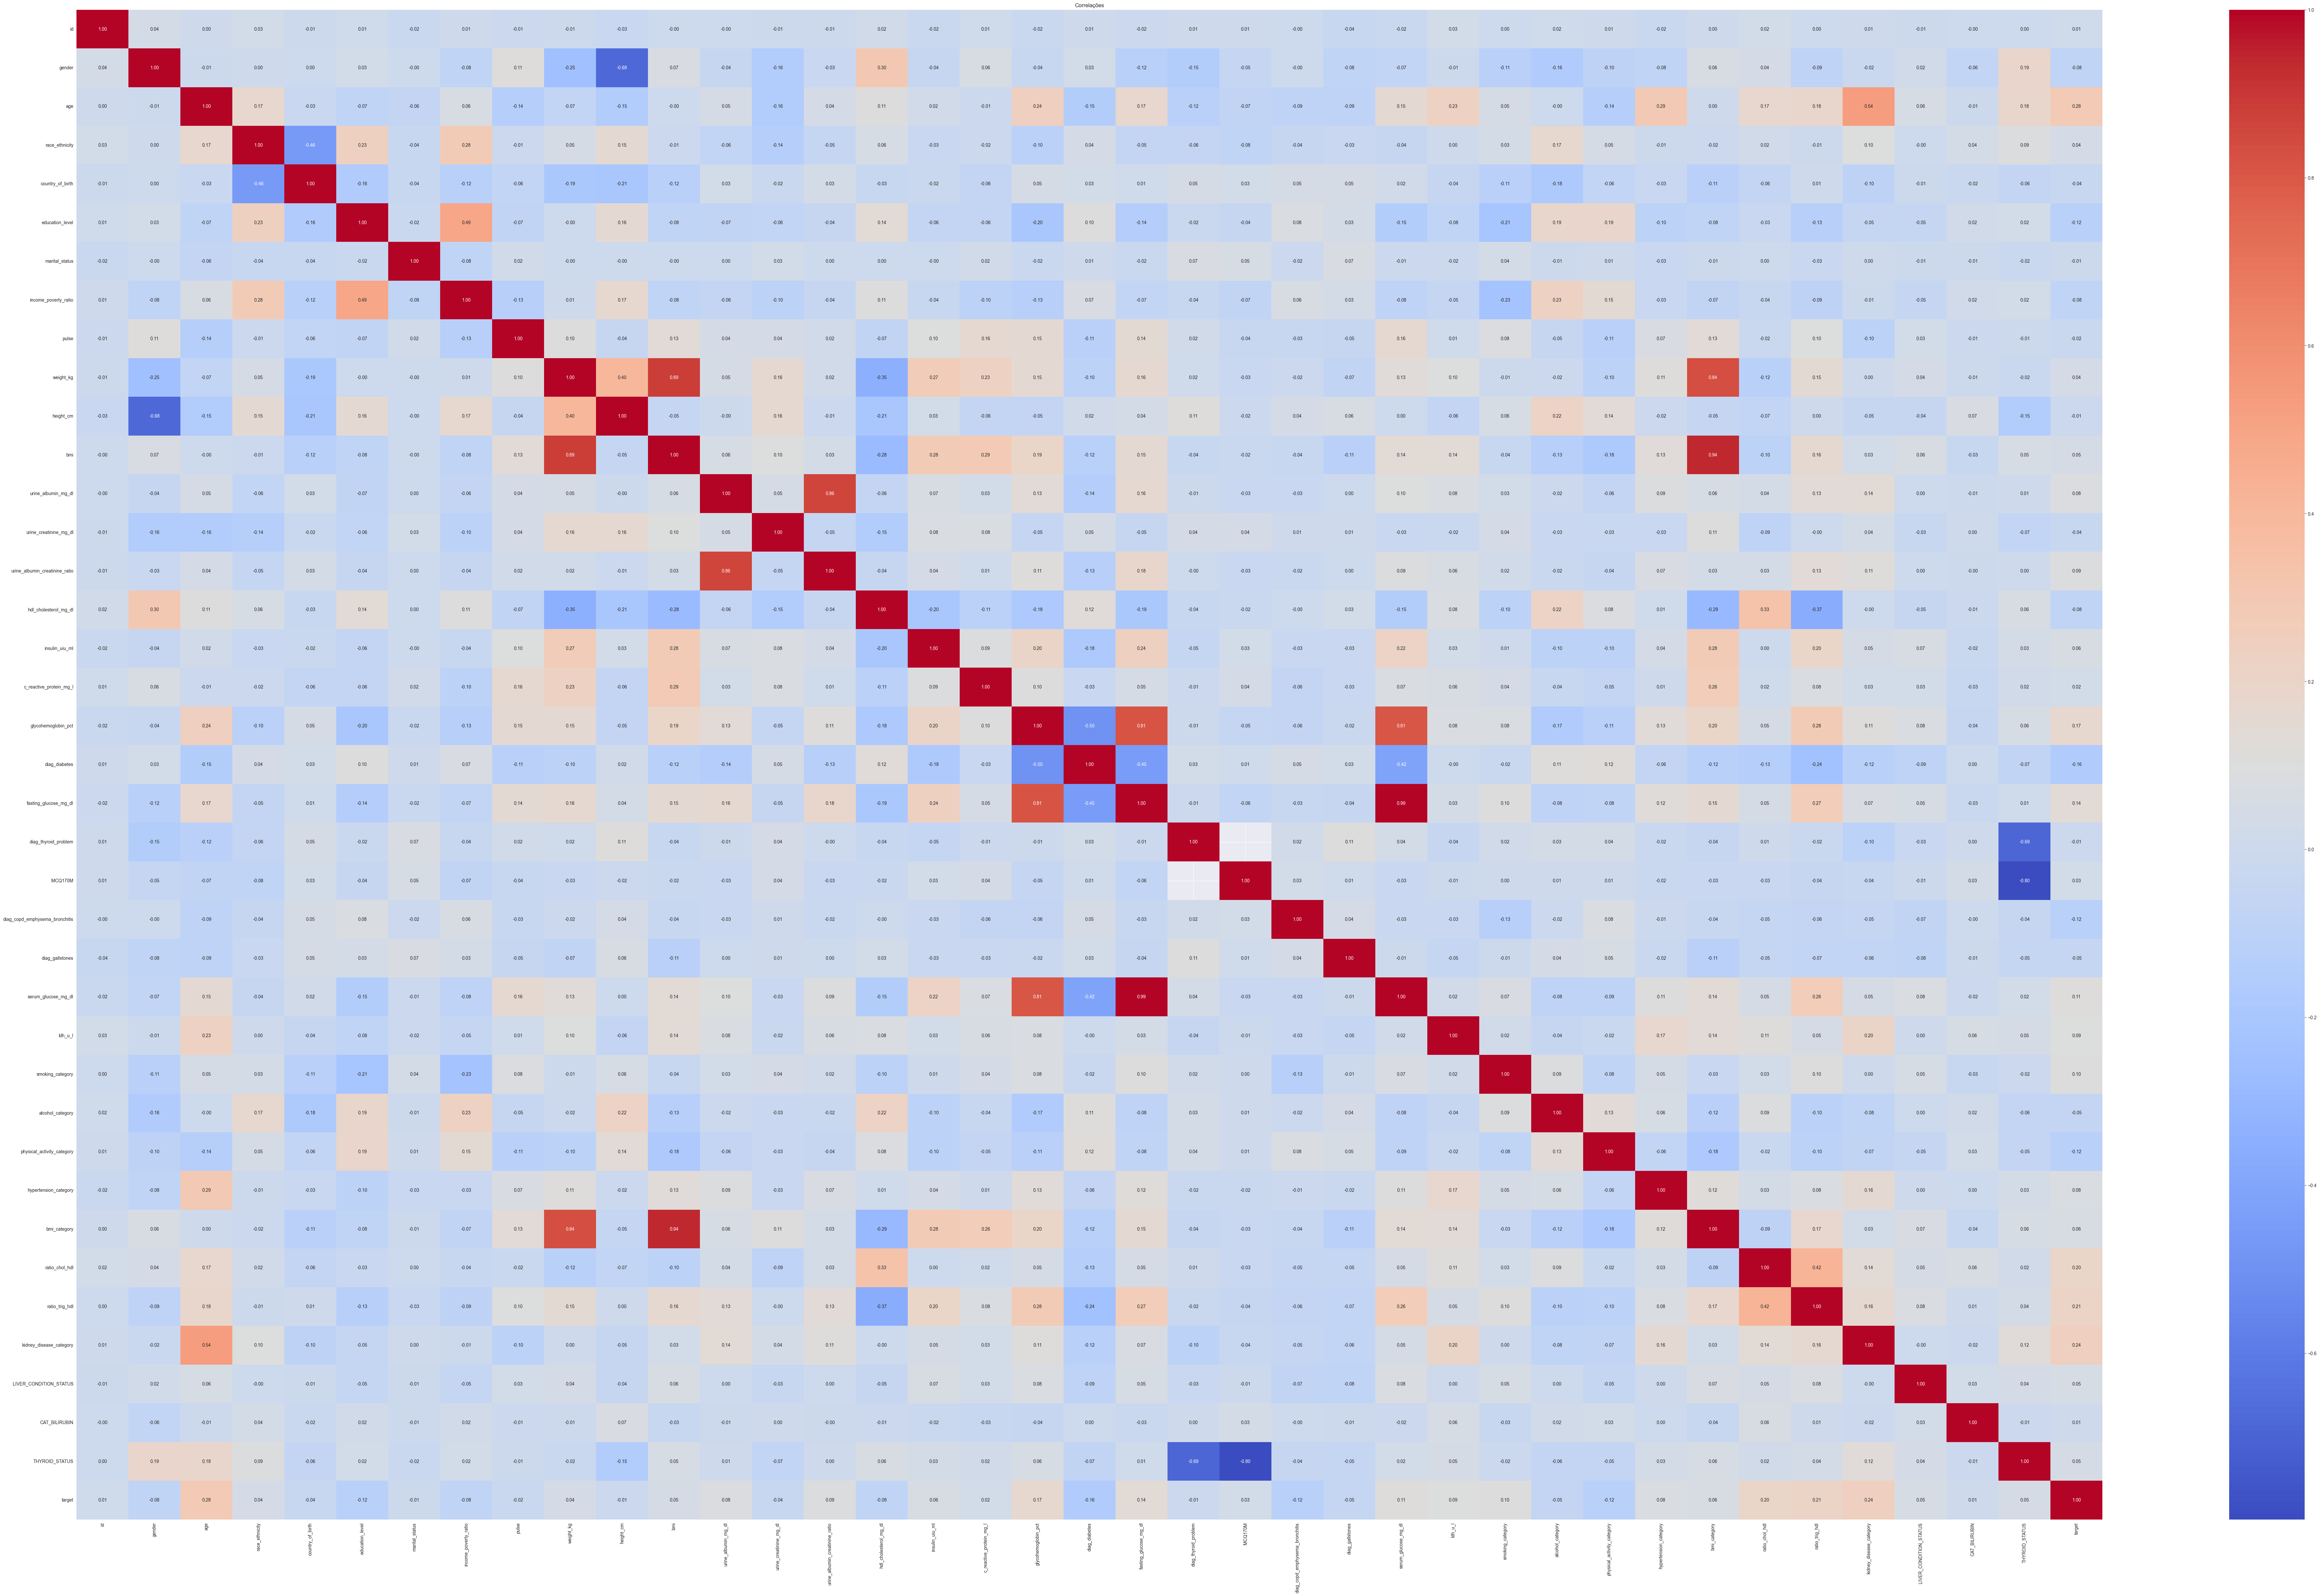

In [248]:
# The correlation Matrix will be generated after the removal of some columns to enable the comprehension of the studied data
# Attributes correlation matrix
corr = subset_cvd_df.corr(numeric_only=True)

plt.figure(figsize=(100, 60))

sns.heatmap(data=corr,annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlações')

plt.show()

## Remoção de valores faltantes

In [249]:
print("Number of null values per column after processing:")
print(subset_cvd_df.isnull().sum().to_string())

Number of null values per column after processing:
id                                   0
gender                               0
age                                  0
race_ethnicity                       0
country_of_birth                    15
education_level                     14
marital_status                      15
income_poverty_ratio              1317
pulse                             1945
weight_kg                         1825
height_cm                         1811
bmi                               1838
urine_albumin_mg_dl               1898
urine_creatinine_mg_dl            1898
urine_albumin_creatinine_ratio    1898
hdl_cholesterol_mg_dl             2310
insulin_uiu_ml                    4738
c_reactive_protein_mg_l           2214
glycohemoglobin_pct               2041
diag_diabetes                        1
fasting_glucose_mg_dl             4598
diag_thyroid_problem                 1
MCQ170M                           6753
diag_copd_emphysema_bronchitis       1
diag_gallston

In [250]:
# import pandas as pd
# import numpy as np
#
# # Identify numerical and categorical columns with missing values
# numerical_cols = subset_cvd_df.select_dtypes(include=np.number).columns
# categorical_cols = subset_cvd_df.select_dtypes(include='object').columns
#
# print("Filling missing numerical values with median...")
# for col in numerical_cols:
#     if subset_cvd_df[col].isnull().any():
#         median_val = subset_cvd_df[col].median()
#         subset_cvd_df.fillna({col: median_val}, inplace=True)
#         print(f"  Filled '{col}' with median: {median_val}")
#
# print("\nFilling missing categorical values with mode...")
# for col in categorical_cols:
#     if subset_cvd_df[col].isnull().any():
#         # Mode might return multiple values if they have the same frequency, take the first one
#         mode_val = subset_cvd_df[col].mode()[0]
#         subset_cvd_df[col].fillna(mode_val, inplace=True)
#         print(f"  Filled '{col}' with mode: {mode_val}")
#
# print("\nMissing values after imputation:")
# print(subset_cvd_df.isnull().sum().sum())
#
# subset_cvd_df.info()

In [251]:
print("Number of null values per column after processing:")
print(subset_cvd_df.isnull().sum())

Number of null values per column after processing:
id                                   0
gender                               0
age                                  0
race_ethnicity                       0
country_of_birth                    15
education_level                     14
marital_status                      15
income_poverty_ratio              1317
pulse                             1945
weight_kg                         1825
height_cm                         1811
bmi                               1838
urine_albumin_mg_dl               1898
urine_creatinine_mg_dl            1898
urine_albumin_creatinine_ratio    1898
hdl_cholesterol_mg_dl             2310
insulin_uiu_ml                    4738
c_reactive_protein_mg_l           2214
glycohemoglobin_pct               2041
diag_diabetes                        1
fasting_glucose_mg_dl             4598
diag_thyroid_problem                 1
MCQ170M                           6753
diag_copd_emphysema_bronchitis       1
diag_gallston

In [252]:
subset_cvd_df.drop(columns=['weight_kg', 'height_cm', 'country_of_birth', 'marital_status', 'urine_albumin_mg_dl', 'urine_creatinine_mg_dl', 'hdl_cholesterol_mg_dl',
                            'MCQ170M', 'diag_copd_emphysema_bronchitis', 'diag_gallstones'], inplace=True)

subset_cvd_df.dropna(inplace=True)

subset_cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1666 entries, 1 to 7800
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1666 non-null   float64
 1   gender                          1666 non-null   float64
 2   age                             1666 non-null   float64
 3   race_ethnicity                  1666 non-null   int32  
 4   education_level                 1666 non-null   float64
 5   income_poverty_ratio            1666 non-null   float64
 6   pulse                           1666 non-null   float64
 7   bmi                             1666 non-null   float64
 8   urine_albumin_creatinine_ratio  1666 non-null   float64
 9   insulin_uiu_ml                  1666 non-null   float64
 10  c_reactive_protein_mg_l         1666 non-null   float64
 11  glycohemoglobin_pct             1666 non-null   float64
 12  diag_diabetes                   1666 no

# Treinamento

## Importando bibliotecas necessárias para treinamento e avaliação dos modelos

In [253]:
# Importing helpers, metrics e and models
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


In [254]:
resultados = []
resultados

[]

In [255]:
cnf_matrices = []
cnf_matrices

[]

In [256]:
curvas_roc = []
curvas_roc

[]

## Divisão dos dados e Treinamento dos modelos

In [257]:
# Create a crosstab of target and race_ethnicity
# The 'target' column is the CVD status (0: No CVD, 1: CVD)
# The 'race_ethnicity' column represents different race/ethnicity groups
# We use normalize='index' to show the proportion of target=1 within each race_ethnicity group
race_ethnicity_target_incidence = pd.crosstab(
    subset_cvd_df['race_ethnicity'],
    subset_cvd_df['target'],
    normalize='index' # Normalizes across rows, showing proportion within each race/ethnicity
)

# Rename columns for clarity
race_ethnicity_target_incidence.columns = ['No CVD (%)', 'CVD (%)']

# Display the table
print("Incidência de Doença Cardiovascular por Raça/Etnia:")
display(race_ethnicity_target_incidence)

Incidência de Doença Cardiovascular por Raça/Etnia:


,No CVD (%),CVD (%)
race_ethnicity,,
0,0.916667,0.083333
1,0.913729,0.086271


In [258]:
# Count individuals with target=1 (CVD) for each race_ethnicity
cvd_by_race = subset_cvd_df[subset_cvd_df['target'] == 1]['race_ethnicity'].value_counts().sort_index()
cvd1_by_race = subset_cvd_df[subset_cvd_df['target'] == 0]['race_ethnicity'].value_counts().sort_index()

print("Number of individuals with CVD (target=1) by Race/Ethnicity:")
display(cvd_by_race)
display(cvd1_by_race)

Number of individuals with CVD (target=1) by Race/Ethnicity:


race_ethnicity
0    49
1    93
Name: count, dtype: int64

race_ethnicity
0    539
1    985
Name: count, dtype: int64

Tamanho do conjunto para CV (70%): (1166, 28)
Tamanho do conjunto de Teste Final (30%): (500, 28)

--- Iniciando Validação Cruzada (5 folds) ---
Regressão Logística: F1-Score Médio = 0.3385 (+/- 0.0715)
KNN: F1-Score Médio = 0.0684 (+/- 0.1261)
Árvore de Decisão: F1-Score Médio = 0.1939 (+/- 0.1354)
Random Forest: F1-Score Médio = 0.0182 (+/- 0.0727)
Gradient Boosting: F1-Score Médio = 0.2378 (+/- 0.2457)

--- Avaliação Final no Conjunto de Teste (Holdout 30%) ---

Resultados da Validação Cruzada (Esperado):


,Acurácia (Média),Acurácia (Std),Precisão (Média),Recall (Média),F1-Score (Média),AUC (Média)
Regressão Logística,0.776149,0.014335,0.225953,0.676842,0.338528,0.826866
KNN,0.909090,0.006878,0.240000,0.040526,0.068381,0.635844
Árvore de Decisão,0.875632,0.015195,0.216282,0.181053,0.193866,0.560525
Random Forest,0.914236,0.000147,0.100000,0.010000,0.018182,0.825304
Gradient Boosting,0.909941,0.012488,0.434042,0.171053,0.237773,0.839511



Resultados do Teste Final (Realidade):


,Acurácia,Precisão,Recall,F1-Score,AUC
Modelo,,,,,
Regressão Logística,0.764,0.209302,0.627907,0.313953,0.702356
KNN,0.904,0.000000,0.000000,0.000000,0.494530
Árvore de Decisão,0.850,0.100000,0.093023,0.096386,0.507124
Random Forest,0.912,0.000000,0.000000,0.000000,0.498906
Gradient Boosting,0.902,0.250000,0.069767,0.109091,0.525037


<Figure size 1200x600 with 0 Axes>

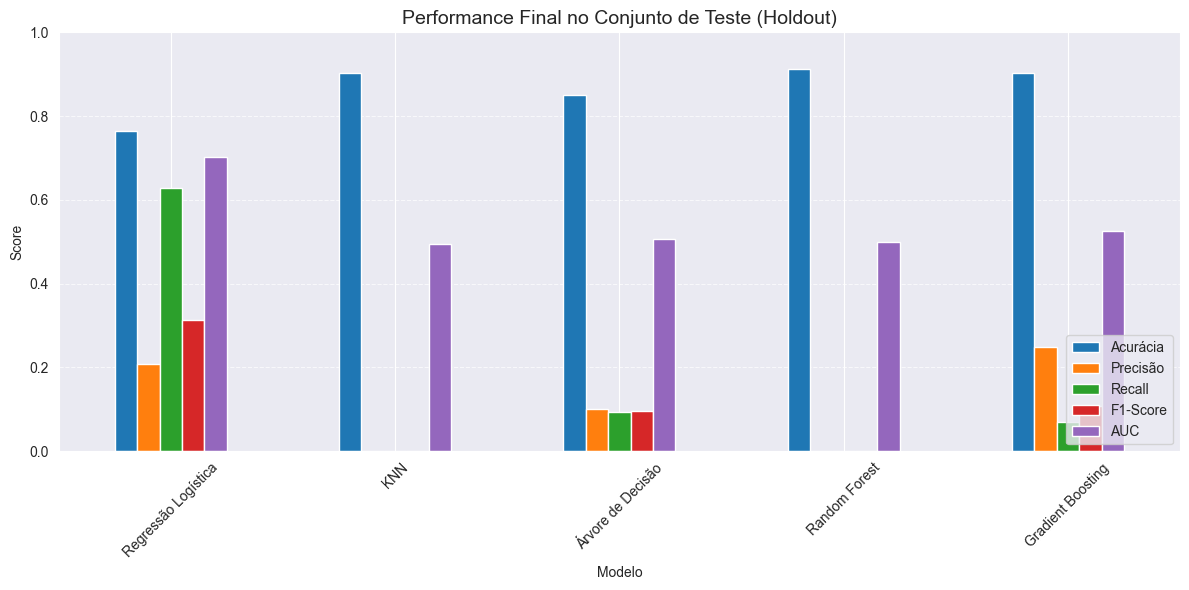

In [259]:
# 1. Separação inicial: 70% para Treino/CV, 30% para Teste Final (Holdout)
X = subset_cvd_df.drop(columns=['target'])
y = subset_cvd_df['target']
y_to_bias = None

# Usamos 'stratify=y' para manter a mesma proporção de classes nos treinos e testes
X_train_cv, X_test_final, y_train_cv, y_test_final = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho do conjunto para CV (70%): {X_train_cv.shape}")
print(f"Tamanho do conjunto de Teste Final (30%): {X_test_final.shape}")

# 2. Definição dos Pipelines e Modelos
# Pipelines garantem que o StandardScaler só seja ajustado nos dados de TREINO de cada fold
pipelines = {
    "Regressão Logística": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    # Modelos de árvore geralmente não precisam de scaling, mas não faz mal.
    # Vamos usá-los diretamente para economizar tempo, ou você pode criar pipelines vazios.
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 3. Loop de Validação Cruzada (K-Fold)
cv_folds = 5
skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

# Dicionário para armazenar os resultados da CV
cv_results = {}

print(f"\n--- Iniciando Validação Cruzada ({cv_folds} folds) ---")
for nome, modelo in pipelines.items():
    # Definimos as métricas que queremos avaliar em cada fold
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # cross_validate roda o treinamento e avaliação K vezes
    scores = cross_validate(modelo, X_train_cv, y_train_cv, cv=skf, scoring=scoring, n_jobs=-1)

    # Armazena a média e o desvio padrão de cada métrica
    cv_results[nome] = {
        "Acurácia (Média)": scores['test_accuracy'].mean(),
        "Acurácia (Std)": scores['test_accuracy'].std(),
        "Precisão (Média)": scores['test_precision'].mean(),
        "Recall (Média)": scores['test_recall'].mean(),
        "F1-Score (Média)": scores['test_f1'].mean(),
        "AUC (Média)": scores['test_roc_auc'].mean()
    }
    print(f"{nome}: F1-Score Médio = {scores['test_f1'].mean():.4f} (+/- {scores['test_f1'].std()*2:.4f})")

# 4. Avaliação Final no Test Set (Holdout)
# Após escolher os melhores modelos via CV, treinamos no conjunto TOTAL de treino (70%)
# e avaliamos UMA VEZ no conjunto de teste final (30%).

print("\n--- Avaliação Final no Conjunto de Teste (Holdout 30%) ---")
teste_final_resultados = []

for nome, modelo in pipelines.items():
    # Treina no conjunto total de 70%
    modelo.fit(X_train_cv, y_train_cv)

    # Predições no teste final de 30%
    y_pred_final = modelo.predict(X_test_final)
    if nome == 'Regressão Logística':
        y_to_bias = y_pred_final

    # ROC AUC
    roc_auc = roc_auc_score(y_test_final, y_pred_final)
    fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_final)

    curvas_roc.append({
        "Modelo": nome,
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "AUC": roc_auc
    })
    cnf_matrices.append({
        "Modelo": nome,
        "Matriz de confusão": confusion_matrix(y_test_final, y_pred_final)
    })
    teste_final_resultados.append({
        "Modelo": nome,
        "Acurácia": accuracy_score(y_test_final, y_pred_final),
        "Precisão": precision_score(y_test_final, y_pred_final),
        "Recall": recall_score(y_test_final, y_pred_final),
        "F1-Score": f1_score(y_test_final, y_pred_final),
        "AUC": roc_auc
    })

# Cria DataFrame dos resultados finais
df_teste_final = pd.DataFrame(teste_final_resultados).set_index("Modelo")

# exibe os resultados
print("\nResultados da Validação Cruzada (Esperado):")
display(pd.DataFrame(cv_results).T)

print("\nResultados do Teste Final (Realidade):")
display(df_teste_final)

# (Opcional) Plotar apenas os resultados do teste final para visualização
plt.figure(figsize=(12,6))
df_teste_final[['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC']].plot(kind="bar", figsize=(12,6))
plt.title("Performance Final no Conjunto de Teste (Holdout)", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [260]:
!pip install aif360


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [261]:
from aif360.sklearn import metrics as mt

prot_gender = X_test_final['gender']

# Equal Opportunity Difference
eod = mt.equal_opportunity_difference(y_test_final, y_to_bias, prot_attr=prot_gender)
print(f"Equal Opportunity Difference: {eod:.3f}")

# Statistical Parity Difference
spd = mt.statistical_parity_difference(y_test_final, y_to_bias, prot_attr=prot_gender)
print(f"Statistical Parity Difference: {spd:.3f}")

# Average Odds Difference
aod = mt.average_odds_difference(y_test_final, y_to_bias, prot_attr=prot_gender)
print(f"Average Odds Difference: {aod:.3f}")

Equal Opportunity Difference: -0.260
Statistical Parity Difference: -0.229
Average Odds Difference: -0.233


In [262]:
from aif360.sklearn import metrics as mt

prot_race = X_test_final['race_ethnicity']

# Equal Opportunity Difference
eod = mt.equal_opportunity_difference(y_test_final, y_to_bias, prot_attr=prot_race)
print(f"Equal Opportunity Difference: {eod:.3f}")

# Statistical Parity Difference
spd = mt.statistical_parity_difference(y_test_final, y_to_bias, prot_attr=prot_race)
print(f"Statistical Parity Difference: {spd:.3f}")

# Average Odds Difference
aod = mt.average_odds_difference(y_test_final, y_to_bias, prot_attr=prot_race)
print(f"Average Odds Difference: {aod:.3f}")

Equal Opportunity Difference: -0.204
Statistical Parity Difference: -0.156
Average Odds Difference: -0.179


In [263]:
# from aif360.datasets import BinaryLabelDataset
# from aif360.metrics import ClassificationMetric

# dataset_pred_orig = dataset.copy()
# dataset_pred_orig.labels = y_pred_orig.reshape(-1, 1)

# # --- Métricas de fairness ---
# metric_orig = ClassificationMetric(
#     subset_cvd_df, y_pred_final,
#     unprivileged_groups=[{'Etnia': 0}],
#     privileged_groups=[{'Etnia': 1}]
# )

# SPD_orig = metric_orig.statistical_parity_difference()
# EOD_orig = metric_orig.equal_opportunity_difference()
# AOD_orig = metric_orig.average_odds_difference()

# print("Statistical Parity Difference (SPD):", SPD_orig)
# print("Equal Opportunity Difference (EOD):", EOD_orig)
# print("Average Odds Difference (AOD):", AOD_orig)

# SPD_orig = metric_orig.statistical_parity_difference()
# EOD_orig = metric_orig.equal_opportunity_difference()
# AOD_orig = metric_orig.average_odds_difference()

# print("\n--- Métricas de Fairness (modelo original) ---")
# print(f"Statistical Parity Difference (SPD): {SPD_orig:.4f}")
# print(f"Equal Opportunity Difference (EOD): {EOD_orig:.4f}")
# print(f"Average Odds Difference (AOD): {AOD_orig:.4f}")


[{'Modelo': 'Regressão Logística', 'FPR': array([0.        , 0.22319475, 1.        ]), 'TPR': array([0.        , 0.62790698, 1.        ]), 'Thresholds': array([inf,  1.,  0.]), 'AUC': 0.702356114192662}, {'Modelo': 'KNN', 'FPR': array([0.        , 0.01094092, 1.        ]), 'TPR': array([0., 0., 1.]), 'Thresholds': array([inf,  1.,  0.]), 'AUC': 0.49452954048140046}, {'Modelo': 'Árvore de Decisão', 'FPR': array([0.        , 0.07877462, 1.        ]), 'TPR': array([0.        , 0.09302326, 1.        ]), 'Thresholds': array([inf,  1.,  0.]), 'AUC': 0.5071243193730598}, {'Modelo': 'Random Forest', 'FPR': array([0.        , 0.00218818, 1.        ]), 'TPR': array([0., 0., 1.]), 'Thresholds': array([inf,  1.,  0.]), 'AUC': 0.4989059080962801}, {'Modelo': 'Gradient Boosting', 'FPR': array([0.        , 0.01969365, 1.        ]), 'TPR': array([0.        , 0.06976744, 1.        ]), 'Thresholds': array([inf,  1.,  0.]), 'AUC': 0.5250368937967532}]


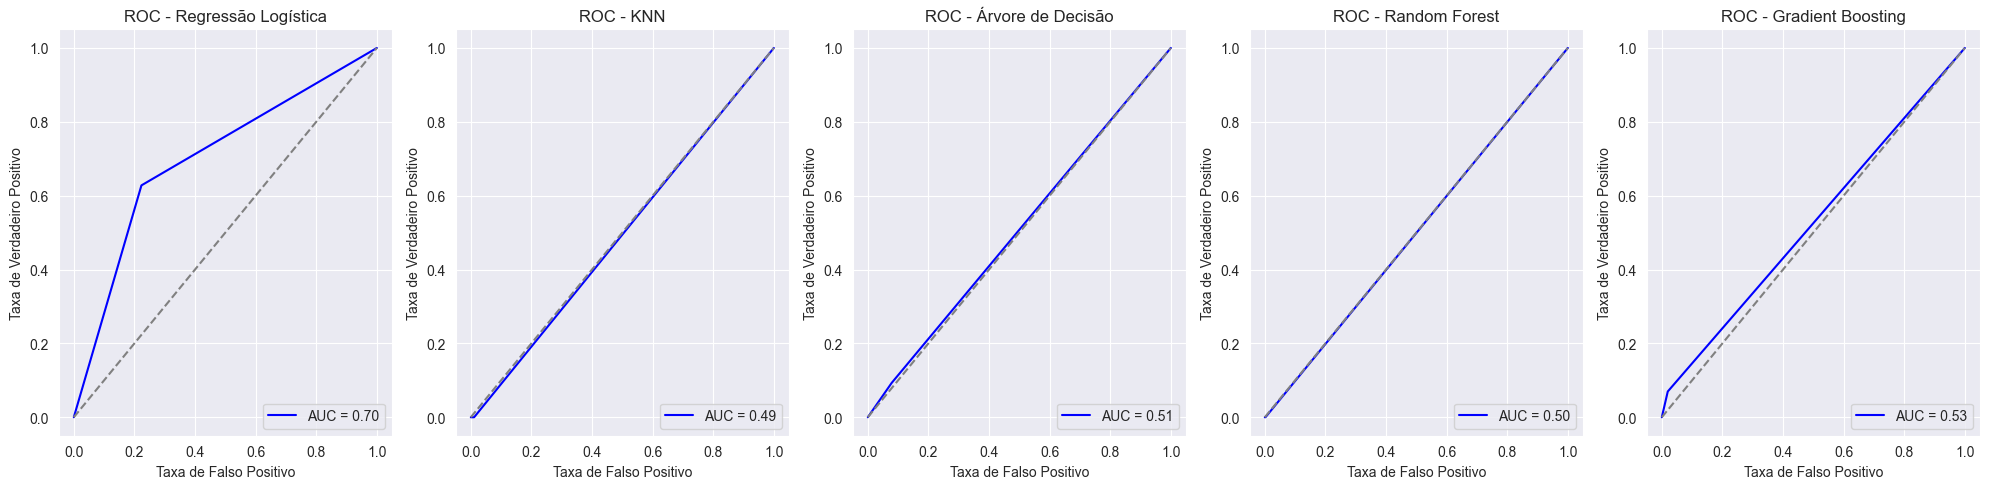

In [264]:
# Curvas ROC
# Subplots: um para cada modelo
print(curvas_roc)
fig, axes = plt.subplots(nrows=1, ncols=len(curvas_roc), figsize=(20, 5))
axes = axes.flatten()

# Plotar cada curva ROC
for i, curva in enumerate(curvas_roc):
    fpr = curva["FPR"]
    tpr = curva["TPR"]
    auc = curva["AUC"]
    nome = curva["Modelo"]

    axes[i].plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')  # linha diagonal
    axes[i].set_title(f"ROC - {nome}")
    axes[i].set_xlabel("Taxa de Falso Positivo")
    axes[i].set_ylabel("Taxa de Verdadeiro Positivo")
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.show()


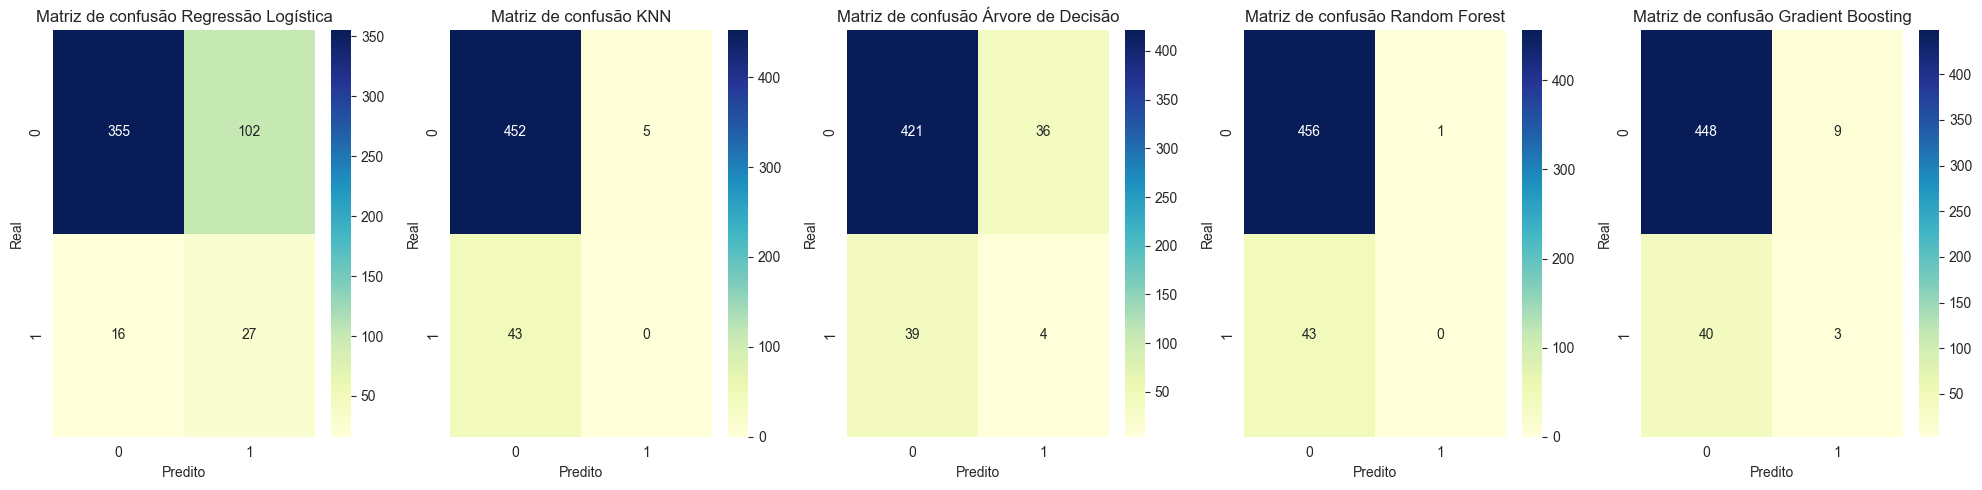

In [265]:
# Matrizes de confusão
# Definir número de subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
axes = axes.flatten()

# Criar os heatmaps
for i, cnf_matrix in enumerate(cnf_matrices):
    sns.heatmap(pd.DataFrame(cnf_matrix['Matriz de confusão']), annot=True, cmap="YlGnBu" ,fmt='g', ax=axes[i])
    axes[i].set_title(f"Matriz de confusão {cnf_matrix['Modelo']}")
    axes[i].set_xlabel("Predito")
    axes[i].set_ylabel("Real")

# Ajustar layout
plt.tight_layout()
plt.show()

In [266]:
dot_data = export_graphviz(
    pipelines['Árvore de Decisão'],
    out_file=None,
    feature_names=X.columns,
    class_names=["Sem doença", "Com doença"],
    filled=True, rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("arvore_decisao", format="png", cleanup=True)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH